In [2]:
aml.dat <- read.table ("clinical_9A_standard_low_risk_sd3.txt", sep="\t", header=TRUE)

In [3]:
dim (aml.dat)

[1]  72 471

In [4]:
y.vec <- c(rep(0, 44), rep(1, 28))
y.vec

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[39] 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [5]:
p.vec <- apply (aml.dat, 2, function (x){ t.test(x[1:44], x[45:72])$p.value})

In [6]:
length (p.vec)

[1] 471

In [7]:
sum (p.vec < 0.00000005)

[1] 28

In [8]:
ind <- which (p.vec < 0.00000005)
ind

ENSG00000005381.7 ENSG00000087495.15 ENSG00000095917.12  ENSG00000106006.6 
                 5                 34                 36                 66 
 ENSG00000114405.9 ENSG00000130528.10  ENSG00000132975.7 ENSG00000139117.12 
                90                124                132                158 
ENSG00000147488.10 ENSG00000153898.11  ENSG00000163106.9 ENSG00000164929.15 
               176                193                214                226 
 ENSG00000170893.3  ENSG00000171517.5 ENSG00000172236.15  ENSG00000188626.6 
               262                265                270                330 
ENSG00000197253.12  ENSG00000230453.8  ENSG00000232431.3  ENSG00000248334.5 
               337                387                390                412 
 ENSG00000254369.5  ENSG00000260182.1  ENSG00000261649.4  ENSG00000263961.5 
               423                433                440                444 
 ENSG00000267453.5  ENSG00000271447.4  ENSG00000275325.3  ENSG00000277867.1 
               450                458                463                466

In [9]:
aml.sub <- aml.dat[, ind]
dim (aml.sub)

[1] 72 28

In [10]:
ind.1 <- which (p.vec < 0.0000000005)
ind.1

ENSG00000132975.7  ENSG00000163106.9 ENSG00000172236.15  ENSG00000188626.6 
               132                214                270                330 
 ENSG00000230453.8  ENSG00000232431.3  ENSG00000248334.5 
               387                390                412

In [11]:
aml.sub2 <- aml.dat[,ind.1]
dim (aml.sub2)

[1] 72  7

In [12]:
# change each row name manually
rownames(aml.sub2) <- c("STD1", "STD2", "STD3", "STD4", "STD5", "STD6", "STD7", "STD8", "STD9", "STD10", "STD11",
                      "STD12", "STD13", "STD14", "STD215", "STD16", "STD17", "STD18", "STD19", "STD20", "STD21", 
                       "STD22", "STD23", "STD24", "STD25", "STD26", "STD27", "STD28", "STD29", "STD30", "STD31",
                       "STD32", "STD33", "STD34", "STD35", "STD36", "STD37", "STD38", "STD39", "STD40", "STD41",
                      "STD42", "STD43", "STD44", "LR1", "LR2", "LR3", "LR4", "LR5", "LR6", "LR7", "LR8", "LR9",
                      "LR10", "LR11", "LR12", "LR13", "LR14", "LR15", "LR16", "LR17", "LR18", "LR19", "LR20", "LR21",
                      "LR22", "LR23", "LR24", "LR25", "LR26", "LR27", "LR28")

# Clustering 
## - Identify groups of patients with similar expression patterns across genes

- The below dendrogram identifies groups of patients with similar gene expression levels for each corresponding gene.
    - This is done using the distance formula for all corresponding genes of all possible pairs of patients

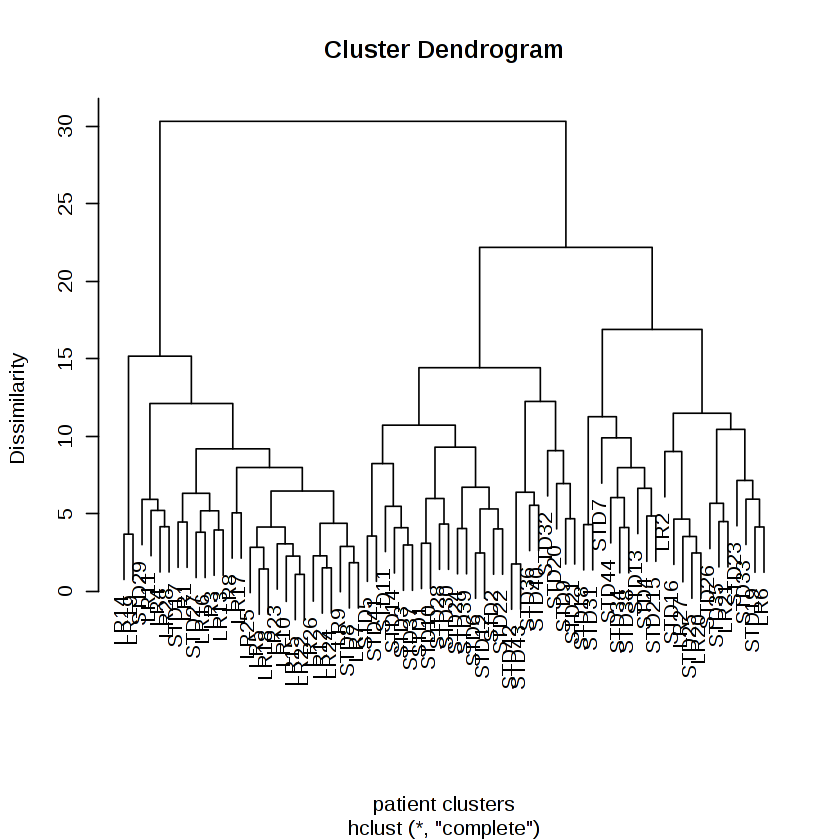

In [13]:
# "dist" function computes and returns the distance matrix computed by using the
# specified distance measure to compute the distances between the rows of a data
# matrix 
# variable "d" applies distance computation between all possible pairs of
# patients in aml.sub
# https://www.rdocumentation.org/packages/stats/versions/3.6.0/topics/dist
d <- dist(aml.sub2, method = "euclidean")
# "hclust" function, Hierarchial cluster analysis on a set of dissimilarities
# and methods for analyzing it. 
# Linkage Method is Complete-Linkage by default. Meaning calculates the maximum distance between clusters before merging
# https://www.datacamp.com/community/tutorials/hierarchical-clustering-R
# https://www.rdocumentation.org/packages/stats/versions/3.6.0/topics/hclust
fit <- hclust(d)
plot(fit, ylab="Dissimilarity", xlab="patient clusters")

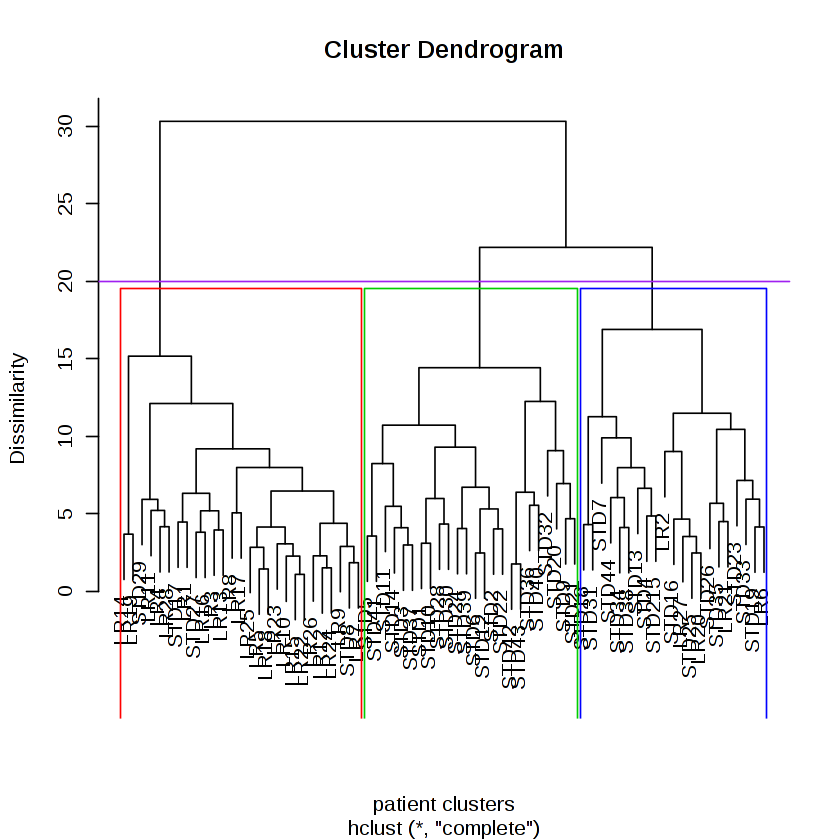

In [14]:
# Cuts a dendrogram tree into several groups by specifying the desired number of clusters k(s), or cut height(s).
# https://www.rdocumentation.org/packages/dendextend/versions/1.7.0/topics/cutree
cut.tree <- cutree(fit, k=3,h=20)
# plot cluster dendrogram
plot(fit, ylab="Dissimilarity", xlab="patient clusters")
# outline clusters in rectangles
rect.hclust(fit, k = 3, border = 2:6)
# cut the cluster dendrogram at specific height
abline(h = 20, col = 'purple')

## - 3 noticeable clusters, tell us the patients who are most similar in gene expression. By looking at the cluster of patients with higher risk of AML we can observe their corresponding genes

### - dist(), the measure of distance quantifies dissimilarity between sample data for numerical computation
### - the smaller the distance value between say "a" and "b" we conclude that "a" and "b" are more similar
http://www.r-tutor.com/gpu-computing/clustering/distance-matrix

In [15]:
aml.sub2[1:2,]
# row vector of standard risk 1 patient
a <- aml.sub2["STD1",]
# row vector of standard risk 2 patient
b <- aml.sub2["STD2",]
# Create a dataframe of these 2 row vectors and calculate distance 
# rbind() (row-bind), this function can be used to combine several vectors, matrices, and/or data frames by rows
dist(rbind(a, b))

,ENSG00000132975.7,ENSG00000163106.9,ENSG00000172236.15,ENSG00000188626.6,ENSG00000230453.8,ENSG00000232431.3,ENSG00000248334.5
STD1,-4.929885,-1.750790,3.8831838,1.682999,1.433346,-0.286907,3.081828
STD2,-4.413837,-6.927145,0.3290561,3.457917,-1.237154,3.691902,4.457377


         STD1
STD2 8.227864

In [16]:
dist.formula <- sqrt((-4.929885 + 4.413837)^2 + (-1.750790 + 6.927145)^2 + (3.8831838 - 0.3290561)^2 + (1.682999 - 3.457917)^2
               + (1.433346 + 1.237154)^2 + (-0.286907 - 3.691902)^2 + (3.081828 - 4.457377)^2)
dist.formula

[1] 8.227864

## - Identify groups of genes with similar expression patterns across different patients

In [17]:
# get transpose of dataframe
transpose.data <- t(aml.sub2)
# check the dimensions of the transpose dataframe
dim(transpose.data)
dim(aml.sub2)
# visual display of transpose dataframe
transpose.data[1:2,]
# compute the distances between each corresponding gene within patients
d.mat.genes <- dist(transpose.data, method = "euclidean")
# small little display of what is happening
d.mat.genes

[1]  7 72

[1] 72  7

,STD1,STD2,STD3,STD4,STD5,STD6,STD7,STD8,STD9,STD10,⋯,LR19,LR20,LR21,LR22,LR23,LR24,LR25,LR26,LR27,LR28
ENSG00000132975.7,-4.929885,-4.413837,-5.93368997,-4.7960056,-3.9773418,-4.555115,-2.733922,3.265935,-6.140937,-6.927145,⋯,4.662549,-4.0053812,-4.910961,3.571334,2.857667,3.569946,2.789208,2.029052,-3.848058,-0.07894083
ENSG00000163106.9,-1.750790,-6.927145,-0.06978729,0.8217642,0.7247067,-3.325705,-1.369037,4.570395,-3.546005,-2.308166,⋯,4.807873,0.7648683,4.466978,4.172099,5.976547,4.313741,5.208357,3.982861,2.231510,3.92049330


                   ENSG00000132975.7 ENSG00000163106.9 ENSG00000172236.15
ENSG00000163106.9           39.50345                                     
ENSG00000172236.15          57.94688          32.92081                   
ENSG00000188626.6           58.72676          63.36332           77.33408
ENSG00000230453.8           54.53593          62.12760           79.08364
ENSG00000232431.3           58.46954          70.04446           85.57605
ENSG00000248334.5           62.70850          49.84621           58.09469
                   ENSG00000188626.6 ENSG00000230453.8 ENSG00000232431.3
ENSG00000163106.9                                                       
ENSG00000172236.15                                                      
ENSG00000188626.6                                                       
ENSG00000230453.8           30.17190                                    
ENSG00000232431.3           20.72559          33.32125                  
ENSG00000248334.5           36.72577        

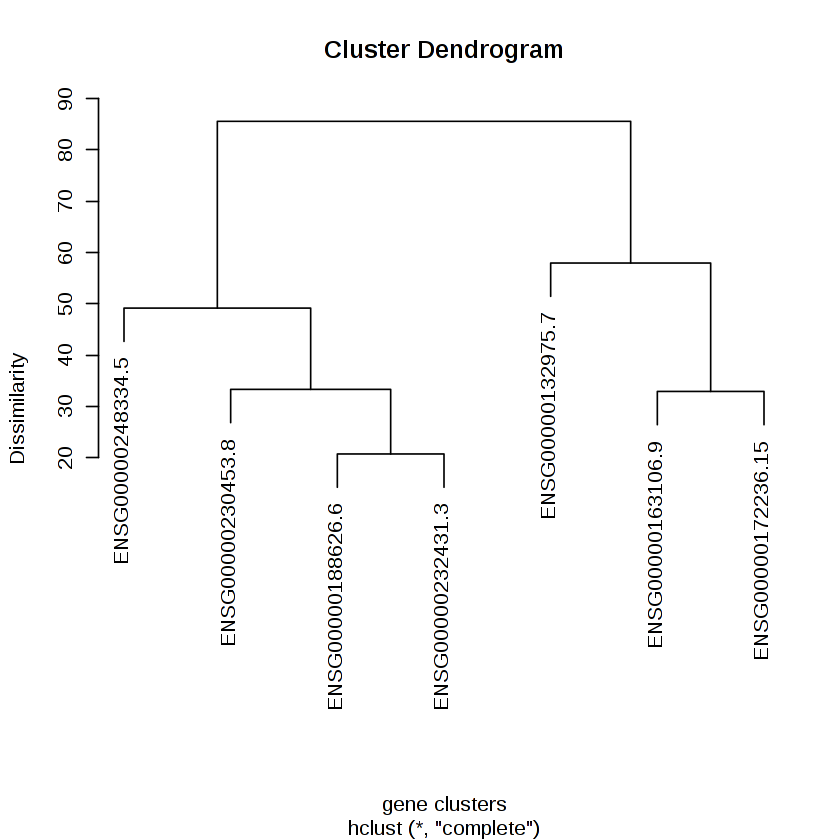

In [18]:
# hierarchial cluster on the distance matrix from above
fit.gene.cluster <- hclust(d.mat.genes)
# plot cluster dendrogram
plot(fit.gene.cluster, ylab="Dissimilarity", xlab="gene clusters")

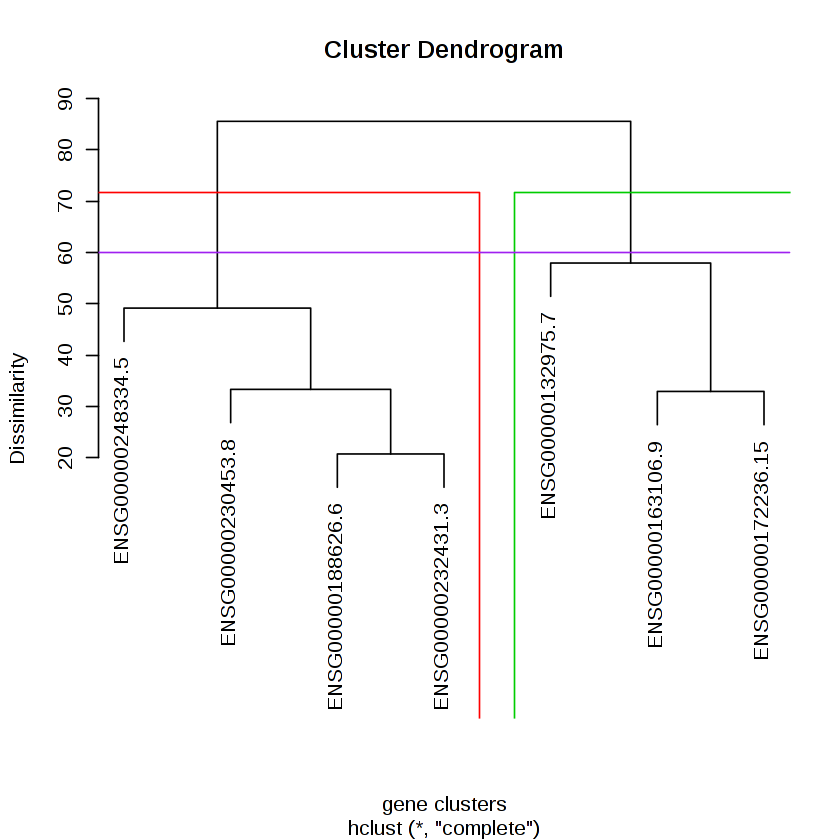

In [19]:
# Cutting the cluster dendrogram into clusters
cut.gene.tree <- cutree(fit.gene.cluster, k=2)
# Plot cluster dendrogram
plot(fit.gene.cluster, ylab="Dissimilarity", xlab="gene clusters")
# Outline clusters in colored rectangles
rect.hclust(fit.gene.cluster, k=2, border=2:6)
# Draw a line cutting the tree at specified height
abline(h = 60, col="purple")

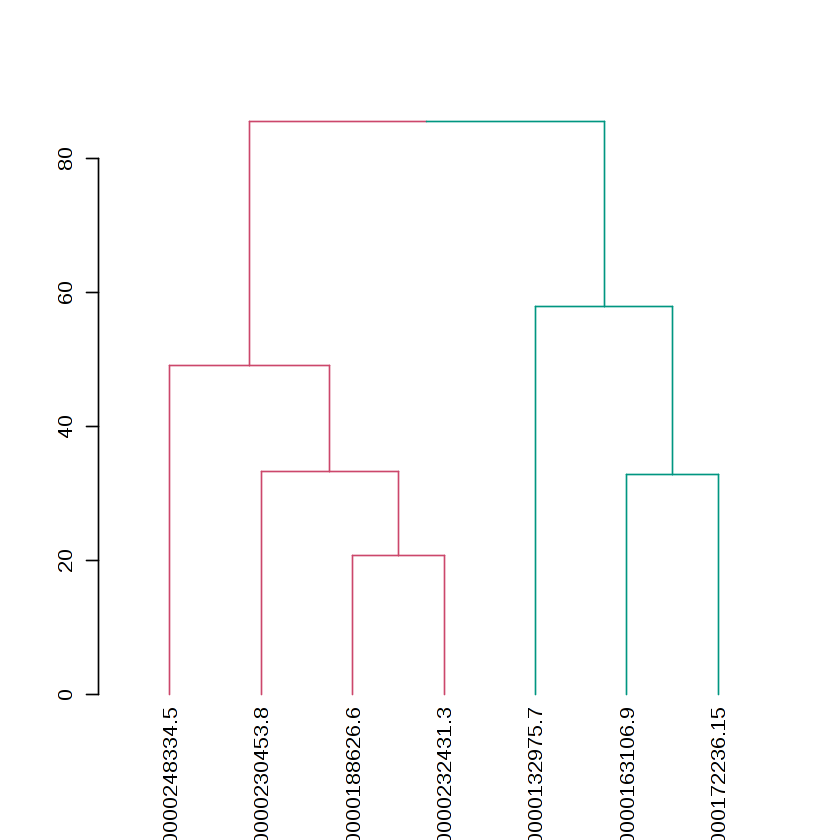

In [20]:
# Another representation of the above cluster dendrogram except clearer
suppressPackageStartupMessages(library(dendextend))
gene_dend_obj <- as.dendrogram(fit.gene.cluster)
gene_col_dend <- color_branches(gene_dend_obj, h = 60)
plot(gene_col_dend)

## Delve into the meaning of these genes and gain a deeper understanding

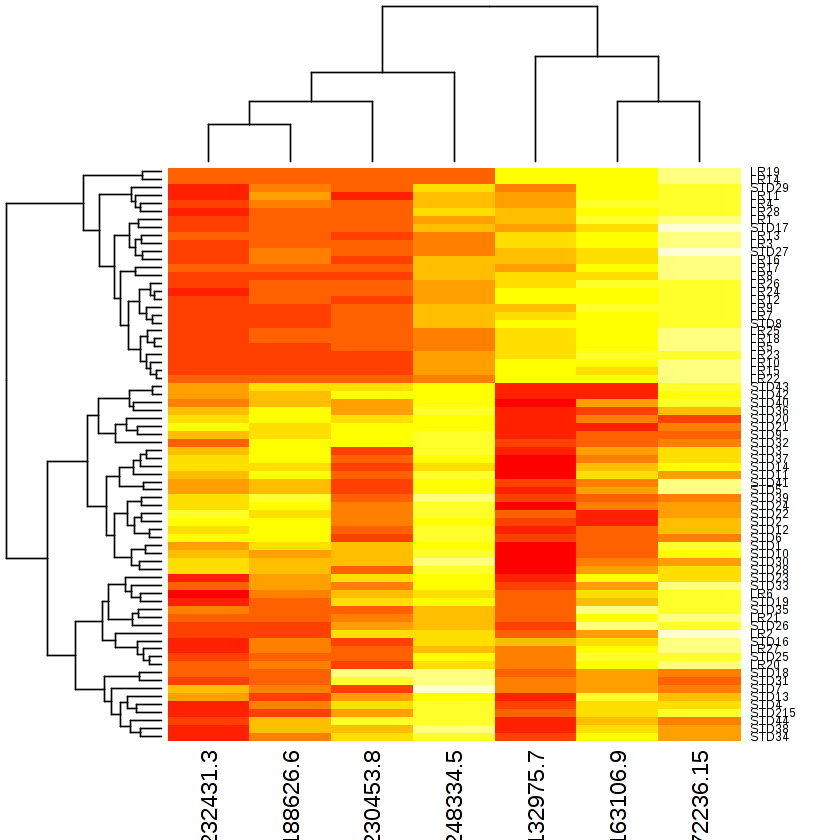

In [33]:
heatmap(as.matrix(aml.sub2), keep.dendro = TRUE)

## Cluster 1
- Gene 412: ENSG00000248334.5 - pseudogene
    - WAS protein homolog associated with actin, golgi membranes and microtubules pseudogene 2
- Gene 387: ENSG00000230453.8 - protein coding gene, 
    - Gene Ontology (GO) annotations related to this gene include nucleotide binding.
    An important paralog of this gene is ANKRD18A.
- Gene 330: ENSG00000188626.6 - protein coding gene 
    - An important paralog of this gene is GOLGA8J.
- Gene 390: ENSG00000232431.3 - pseudogene


## Cluster 2
- Gene 132: ENSG00000132975.7	- protein coding gene
    - G protein-coupled receptor 12
- Gene 214: ENSG00000163106.9 - blood protein levels, cholesterol, LDL, schizophrenia, testicular germ cell tumor 
    - Phenotype, disease and trait annotations associated with variants in this gene: blood protein levels, cholesterol, LDL, schizophrenia, socioeconomic factors, testicular germ cell tumor
	Many diseases related to this gene found on rat and mouse
- Gene 270: ENSG00000172236.15 - blood protein levels in phenotype
    - Many diseases related to this gene found on rat and mouse

In [22]:
aml.sub2

,ENSG00000132975.7,ENSG00000163106.9,ENSG00000172236.15,ENSG00000188626.6,ENSG00000230453.8,ENSG00000232431.3,ENSG00000248334.5
STD1,-4.9298852,-1.75078970,3.8831838,1.6829990,1.43334600,-0.2869070,3.08182800
STD2,-4.4138368,-6.92714510,0.3290561,3.4579170,-1.23715400,3.6919020,4.45737700
STD3,-5.9336900,-0.06978729,3.0037286,4.8279230,-4.61570300,1.6447320,5.91519000
STD4,-4.7960056,0.82176416,1.0258072,-2.9591090,0.80656870,-5.2250390,2.11520400
STD5,-3.9773418,0.72470667,5.5723970,1.0667730,-2.77203600,-0.3046051,3.37458800
STD6,-4.5551150,-3.32570515,-1.7099926,2.6606530,-4.21148900,2.4919410,4.63951700
STD7,-2.7339221,-1.36903746,-2.2548061,-2.7339220,-4.97028100,-0.4529315,5.36972300
STD8,3.2659348,4.57039504,4.9939359,-6.9271450,-5.37776300,-6.9271450,0.61188970
STD9,-6.1409371,-3.54600519,-3.1155053,3.8011270,5.29653600,1.9663710,5.70870800
STD10,-6.9271451,-2.30816568,3.6194391,0.2960859,1.09687900,0.6328655,4.59431800


In [23]:
ind.2 <- which (p.vec < 0.00000000005)
ind.2

ENSG00000172236.15  ENSG00000248334.5 
               270                412

In [24]:
aml.sub3 <- aml.dat[,ind.2]
dim (aml.sub3)

[1] 72  2

In [25]:
aml.sub3

,ENSG00000172236.15,ENSG00000248334.5
TARGET-20-PADZCG,3.8831838,3.08182800
TARGET-20-PAEAKL,0.3290561,4.45737700
TARGET-20-PAEIKD,3.0037286,5.91519000
TARGET-20-PAKIWK,1.0258072,2.11520400
TARGET-20-PAKIYW,5.5723970,3.37458800
TARGET-20-PAKLPD,-1.7099926,4.63951700
TARGET-20-PAKVGI,-2.2548061,5.36972300
TARGET-20-PAMYAS,4.9939359,0.61188970
TARGET-20-PAMYGX,-3.1155053,5.70870800
TARGET-20-PANDIX,3.6194391,4.59431800


## Gene 270: ENSG00000172236.15
- Tryptase alpha/beta 1
- Associated with 1 phenotype: blood protein levels 
- Tryptase is expressed in myeloblasts in a group of AML and may serve as a useful disease-related marker: http://www.bloodjournal.org/content/98/7/2200.long?sso-checked=true
http://www.bloodjournal.org/content/bloodjournal/98/7/2200.full.pdf?sso-checked=true

## Gene 412: ENSG00000248334.5
- Homolog associated with actin, golgi membranes and microtubules pseudogene
- Pseudogene is an imperfection copy of a functional gene
- Gene type: transcribed unprocessed pseudogene


In [26]:
aml.sub1.glm=glm(y.vec~ENSG00000248334.5,data=aml.sub3,family=binomial(link="logit"))

In [27]:
summary(aml.sub1.glm)


Call:
glm(formula = y.vec ~ ENSG00000248334.5, family = binomial(link = "logit"), 
    data = aml.sub3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4751  -0.3469  -0.1322   0.5309   1.7401  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)         0.7727     0.4195   1.842   0.0655 .  
ENSG00000248334.5  -1.0244     0.2435  -4.206  2.6e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.228  on 71  degrees of freedom
Residual deviance: 44.904  on 70  degrees of freedom
AIC: 48.904

Number of Fisher Scoring iterations: 6


In [28]:
aml.sub2.glm=glm(y.vec~ENSG00000172236.15,data=aml.sub3,family=binomial(link="logit"))
summary(aml.sub2.glm)


Call:
glm(formula = y.vec ~ ENSG00000172236.15, family = binomial(link = "logit"), 
    data = aml.sub3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4155  -0.5998  -0.1476   0.6951   2.0696  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -3.3160     0.8484  -3.908 9.29e-05 ***
ENSG00000172236.15   0.5757     0.1401   4.110 3.96e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.228  on 71  degrees of freedom
Residual deviance: 58.025  on 70  degrees of freedom
AIC: 62.025

Number of Fisher Scoring iterations: 6


In [29]:
aml.sub3.glm=glm(y.vec~ENSG00000248334.5+ENSG00000172236.15,data=aml.sub3,family=binomial(link="logit"))

In [30]:
summary(aml.sub3.glm)


Call:
glm(formula = y.vec ~ ENSG00000248334.5 + ENSG00000172236.15, 
    family = binomial(link = "logit"), data = aml.sub3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2545  -0.2587  -0.0442   0.2990   1.6626  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)         -1.3019     0.9593  -1.357  0.17472   
ENSG00000248334.5   -1.0004     0.3042  -3.288  0.00101 **
ENSG00000172236.15   0.4202     0.1641   2.560  0.01046 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 96.228  on 71  degrees of freedom
Residual deviance: 34.352  on 69  degrees of freedom
AIC: 40.352

Number of Fisher Scoring iterations: 7


Our final model would be $\log(\frac{p}{1-p})=-1.3019-1.0004x_1+0.4202X_2$ where $x_1$ is the expression for ENSG00000248334.5 and $x_2$ is the expression for gene ENSG00000172236.1

We interpret this as for every unit higher in the ENSG00000248334.5 gene expression, the odds of being in low risk for AML is 63% lower $(1-e^{\beta_1}). $

And for every unit higher in ENSG00000172236.15 gene expression, the odds of being low risk is 52% higher $(1-e^{\beta_2})$.

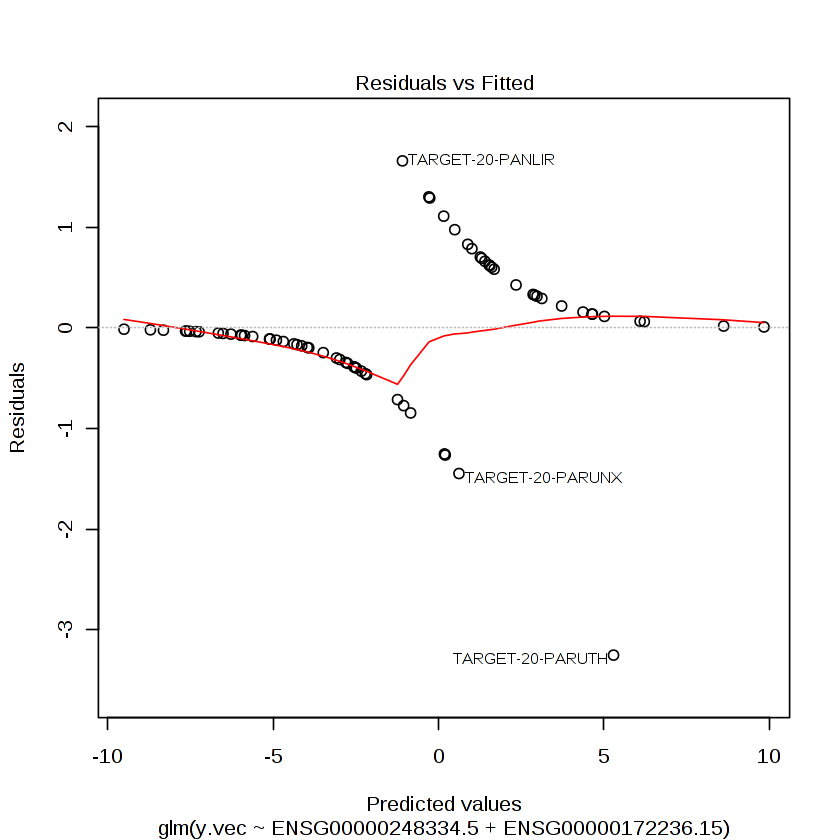

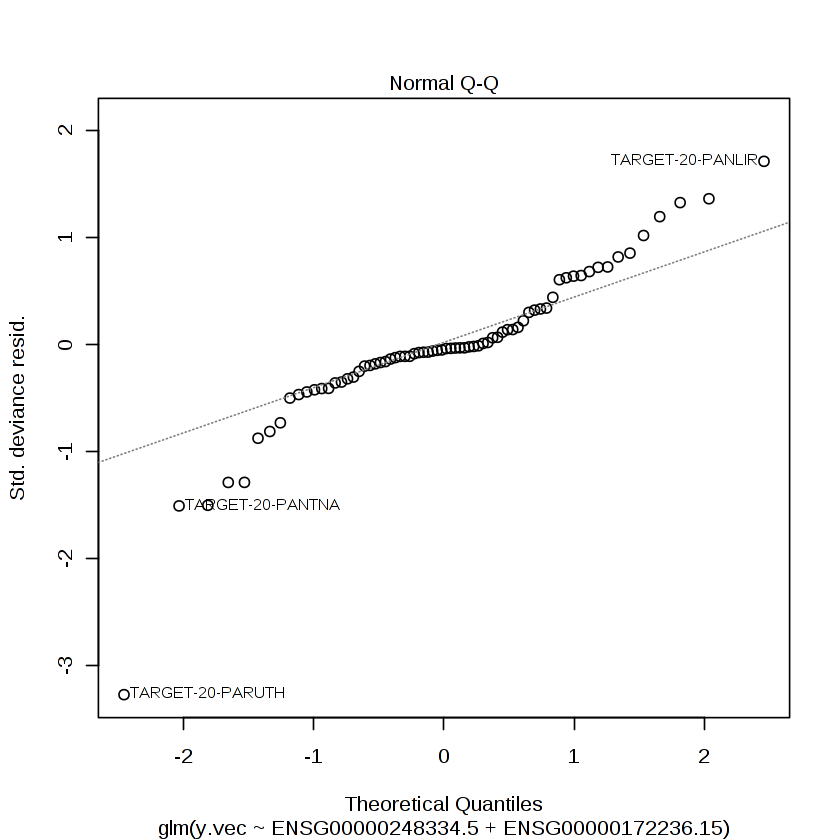

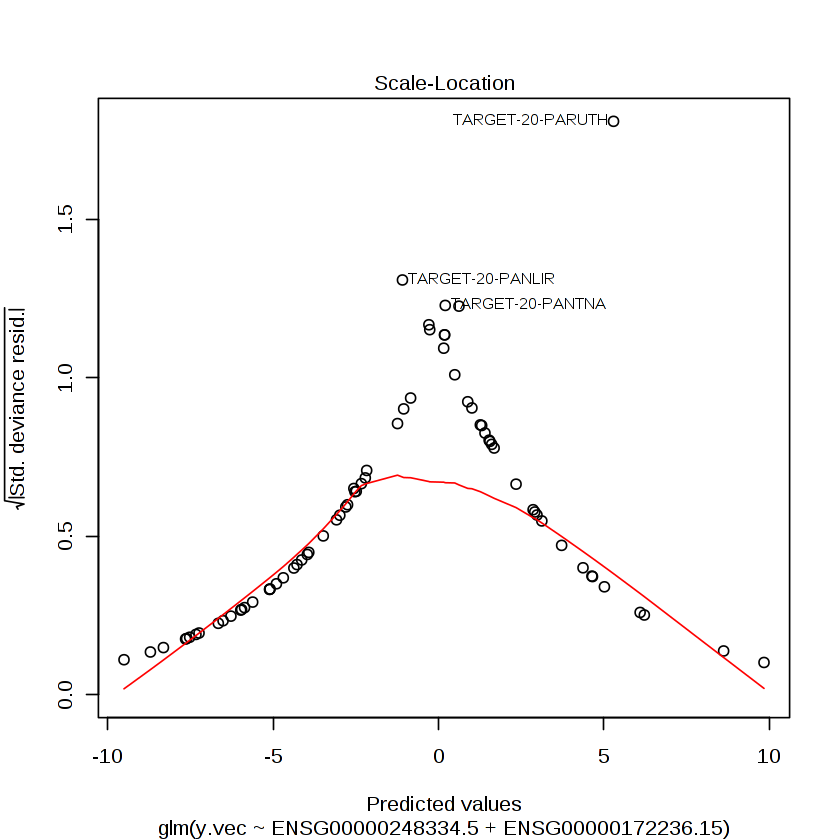

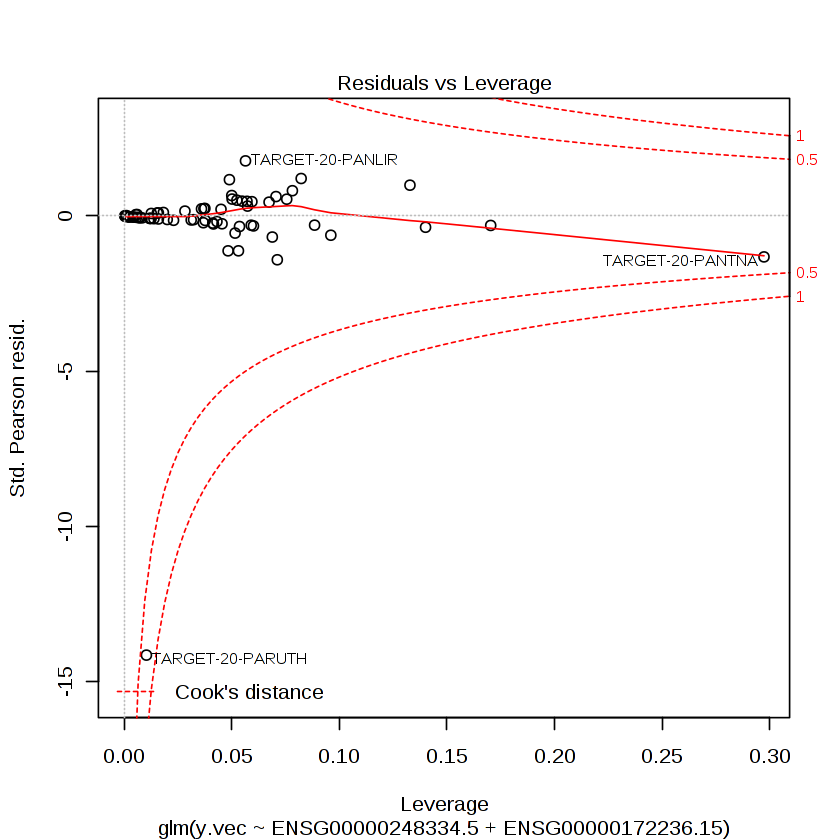

In [31]:
plot(aml.sub3.glm)